# WeGo Bus On-Time Performance Analysis

This notebook analyzes the on-time performance of WeGo Public Transit buses in Nashville using headway data from August 1, 2023 to September 30, 2023.

**Key Variables:**
- **ADHERENCE**: Difference between actual and scheduled departure time (negative = late, positive = early)
- **On-Time**: Generally within -6 to +1 minutes of scheduled time
- **Use ADJUSTED counts** for accurate performance metrics

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette('Set2')

## Load Data

In [2]:
# Load the dataset
wego = pd.read_csv('data/Headway Data, 8-1-2023 to 9-30-2023.csv')

# Display basic info
print(f"Dataset shape: {wego.shape}")
print(f"\nColumns: {wego.columns.tolist()}")
wego.head()

Dataset shape: (350329, 30)

Columns: ['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


## Data Exploration

In [3]:
# Check data types and missing values
print("Data Info:")
wego.info()

print("\nMissing Values:")
print(wego.isnull().sum())

print("\nBasic Statistics:")
wego.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE          

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,350329.000000,350329.000000,338861.000000,274738.000000,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,36.158433,-86.769952,-3.188796,18.186021,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,0.059113,0.065548,6.898842,12.261809,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,36.153870,-86.774535,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


## Question 1: Overall On-Time Performance

What is the overall on-time performance, and what does the distribution of adherence look like?

In [4]:
# Calculate overall on-time performance using ADJUSTED counts
ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()
early = wego['ADJUSTED_EARLY_COUNT'].sum()
late = wego['ADJUSTED_LATE_COUNT'].sum()

total = ontime + early + late
print(f"Total Records: {total:,}")
print(f"\nOverall On-Time Performance: {(ontime / total) * 100:.2f}%")
print(f"Overall Early Performance: {(early / total) * 100:.2f}%")
print(f"Overall Late Performance: {(late / total) * 100:.2f}%")

Total Records: 338,861

Overall On-Time Performance: 79.69%
Overall Early Performance: 2.88%
Overall Late Performance: 17.42%


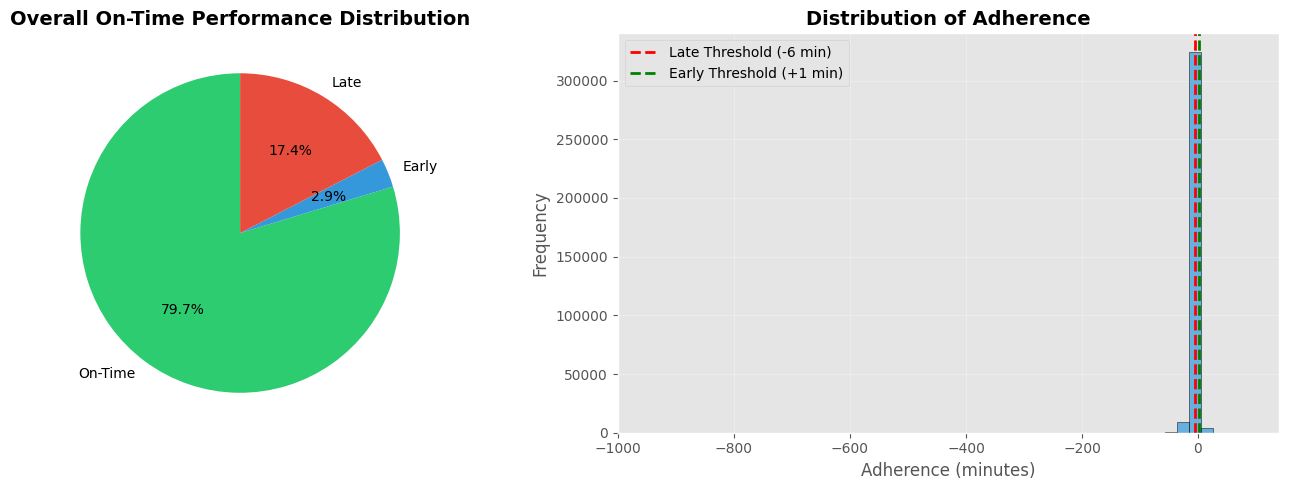

In [5]:
# Visualize the overall performance
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
performance_data = [ontime, early, late]
labels = ['On-Time', 'Early', 'Late']
colors = ['#2ECC71', '#3498DB', '#E74C3C']

ax[0].pie(performance_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax[0].set_title('Overall On-Time Performance Distribution', fontsize=14, fontweight='bold')

# Distribution of adherence
ax[1].hist(wego['ADHERENCE'].dropna(), bins=50, color='#3498DB', edgecolor='black', alpha=0.7)
ax[1].axvline(-6, color='red', linestyle='--', linewidth=2, label='Late Threshold (-6 min)')
ax[1].axvline(1, color='green', linestyle='--', linewidth=2, label='Early Threshold (+1 min)')
ax[1].set_xlabel('Adherence (minutes)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_title('Distribution of Adherence', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Question 2: Geographic Performance

How does direction of travel, route, or location affect on-time performance?

In [6]:
# Performance by direction
direction_performance = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

direction_performance['Total'] = direction_performance.sum(axis=1)
direction_performance['OnTime_Pct'] = (direction_performance['ADJUSTED_ONTIME_COUNT'] / direction_performance['Total']) * 100
direction_performance['Late_Pct'] = (direction_performance['ADJUSTED_LATE_COUNT'] / direction_performance['Total']) * 100

print("Performance by Direction:")
print(direction_performance[['OnTime_Pct', 'Late_Pct']].round(2))

Performance by Direction:
                      OnTime_Pct  Late_Pct
ROUTE_DIRECTION_NAME                      
FROM DOWNTOWN              74.96     22.09
TO DOWNTOWN                85.01     12.18


In [7]:
# Performance by route (top 10 routes by volume)
route_performance = wego.groupby('ROUTE_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

route_performance['Total'] = route_performance.sum(axis=1)
route_performance['OnTime_Pct'] = (route_performance['ADJUSTED_ONTIME_COUNT'] / route_performance['Total']) * 100

# Top 10 routes by total records
top_routes = route_performance.nlargest(10, 'Total')

print("Top 10 Routes by Volume:")
print(top_routes[['Total', 'OnTime_Pct']].round(2))

Top 10 Routes by Volume:
            Total  OnTime_Pct
ROUTE_ABBR                   
55          60359       69.72
56          58950       82.04
52          49327       76.50
3           45488       75.88
50          42629       85.17
23          39653       88.61
22          25188       89.30
7           17267       77.70


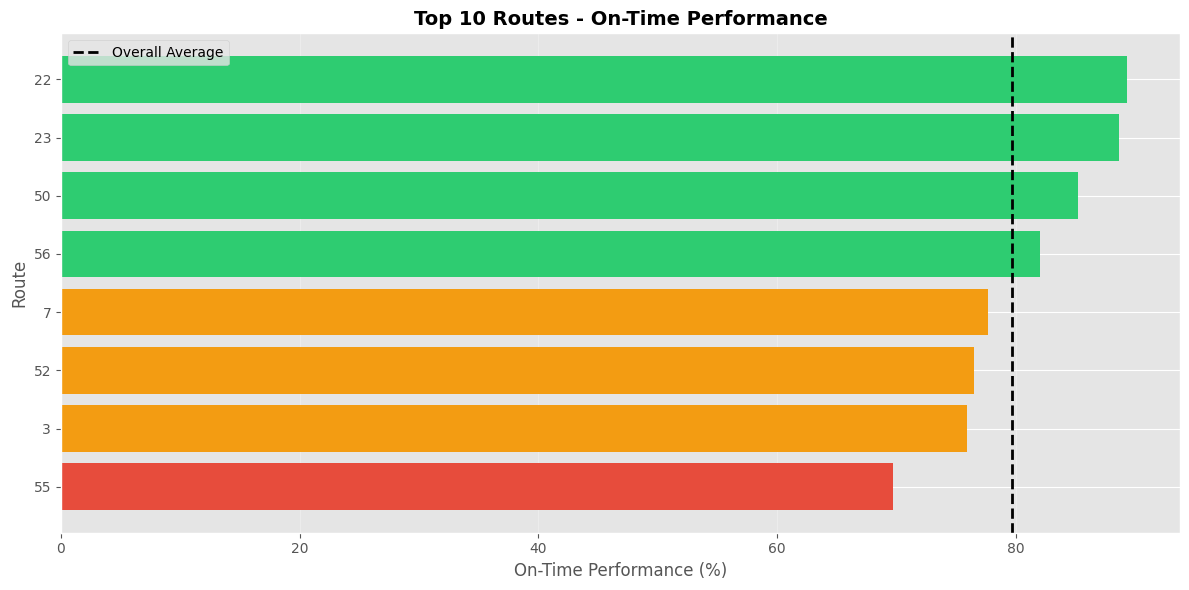

In [8]:
# Visualize route performance
plt.figure(figsize=(12, 6))
top_routes_sorted = top_routes.sort_values('OnTime_Pct')
colors_routes = ['#E74C3C' if x < 75 else '#F39C12' if x < 80 else '#2ECC71' for x in top_routes_sorted['OnTime_Pct']]

plt.barh(top_routes_sorted.index.astype(str), top_routes_sorted['OnTime_Pct'], color=colors_routes)
plt.xlabel('On-Time Performance (%)', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.title('Top 10 Routes - On-Time Performance', fontsize=14, fontweight='bold')
plt.axvline(79.69, color='black', linestyle='--', linewidth=2, label='Overall Average')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Question 3: Temporal Performance

How does time of day or day of week affect on-time performance?

In [9]:
# Convert DATE column to datetime
wego['DATE'] = pd.to_datetime(wego['DATE'])
wego['DAY_OF_WEEK'] = wego['DATE'].dt.day_name()

# Convert scheduled time to datetime for hour extraction
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['HOUR'] = wego['SCHEDULED_TIME'].dt.hour

# Performance by day of week
dow_performance = wego.groupby('DAY_OF_WEEK').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

dow_performance['Total'] = dow_performance.sum(axis=1)
dow_performance['OnTime_Pct'] = (dow_performance['ADJUSTED_ONTIME_COUNT'] / dow_performance['Total']) * 100

# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_performance = dow_performance.reindex(day_order)

print("Performance by Day of Week:")
print(dow_performance[['OnTime_Pct']].round(2))

Performance by Day of Week:
             OnTime_Pct
DAY_OF_WEEK            
Monday            87.04
Tuesday           82.60
Wednesday         81.38
Thursday          80.50
Friday            77.21
Saturday          81.11
Sunday            87.88


In [10]:
# Performance by hour of day
hour_performance = wego.groupby('HOUR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

hour_performance['Total'] = hour_performance.sum(axis=1)
hour_performance['OnTime_Pct'] = (hour_performance['ADJUSTED_ONTIME_COUNT'] / hour_performance['Total']) * 100

print("\nPerformance by Hour of Day:")
print(hour_performance[['OnTime_Pct']].round(2))


Performance by Hour of Day:
      OnTime_Pct
HOUR            
0          78.40
1          67.06
4          97.59
5          95.61
6          92.34
7          83.16
8          77.17
9          86.35
10         89.05
11         88.35
12         85.36
13         85.45
14         80.84
15         74.66
16         71.72
17         71.75
18         75.92
19         76.44
20         80.76
21         84.95
22         86.61
23         80.86


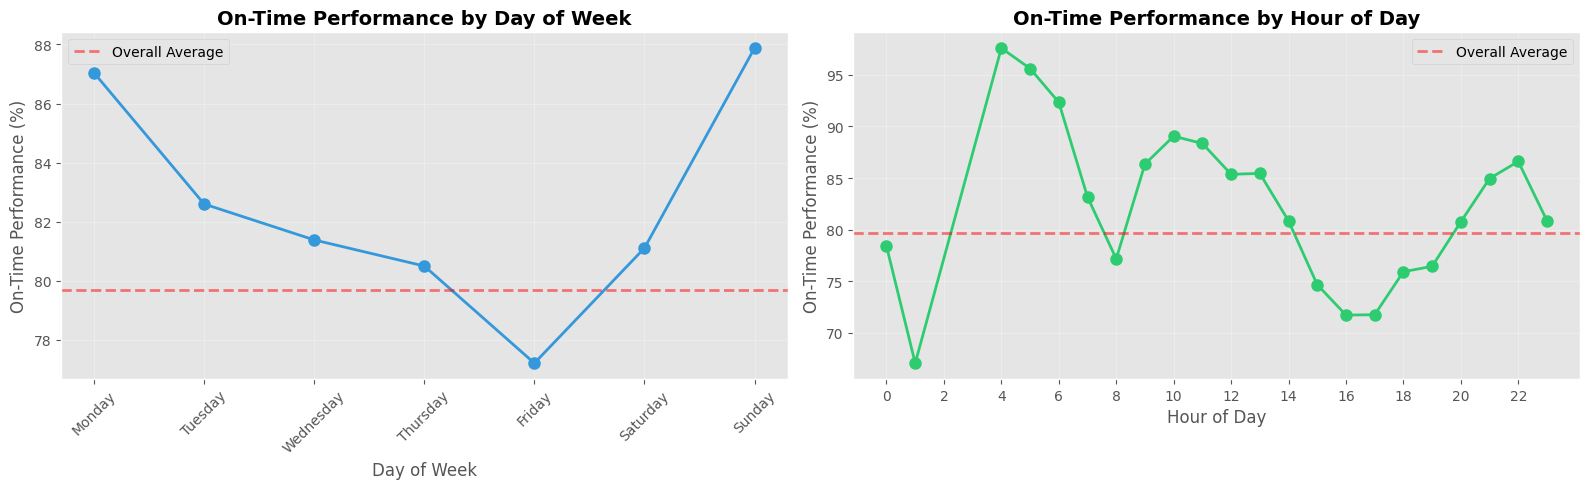

In [11]:
# Visualize temporal patterns
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Day of week
ax[0].plot(dow_performance.index, dow_performance['OnTime_Pct'], marker='o', linewidth=2, markersize=8, color='#3498DB')
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('On-Time Performance (%)', fontsize=12)
ax[0].set_title('On-Time Performance by Day of Week', fontsize=14, fontweight='bold')
ax[0].axhline(79.69, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Overall Average')
ax[0].legend()
ax[0].grid(True, alpha=0.3)
ax[0].tick_params(axis='x', rotation=45)

# Hour of day
ax[1].plot(hour_performance.index, hour_performance['OnTime_Pct'], marker='o', linewidth=2, markersize=8, color='#2ECC71')
ax[1].set_xlabel('Hour of Day', fontsize=12)
ax[1].set_ylabel('On-Time Performance (%)', fontsize=12)
ax[1].set_title('On-Time Performance by Hour of Day', fontsize=14, fontweight='bold')
ax[1].axhline(79.69, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Overall Average')
ax[1].legend()
ax[1].grid(True, alpha=0.3)
ax[1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

## Question 4: Driver Impact

How much of a factor does the driver (OPERATOR) have on on-time performance?

In [12]:
# Performance by operator (only operators with at least 100 records)
operator_performance = wego.groupby('OPERATOR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

operator_performance['Total'] = operator_performance.sum(axis=1)
operator_performance['OnTime_Pct'] = (operator_performance['ADJUSTED_ONTIME_COUNT'] / operator_performance['Total']) * 100

# Filter operators with at least 100 records
operator_filtered = operator_performance[operator_performance['Total'] >= 100]

print(f"Number of operators with 100+ records: {len(operator_filtered)}")
print(f"\nOperator Performance Statistics:")
print(operator_filtered['OnTime_Pct'].describe().round(2))

Number of operators with 100+ records: 286

Operator Performance Statistics:
count    286.00
mean      81.04
std       12.61
min       36.96
25%       75.56
50%       83.54
75%       89.96
max       99.33
Name: OnTime_Pct, dtype: float64


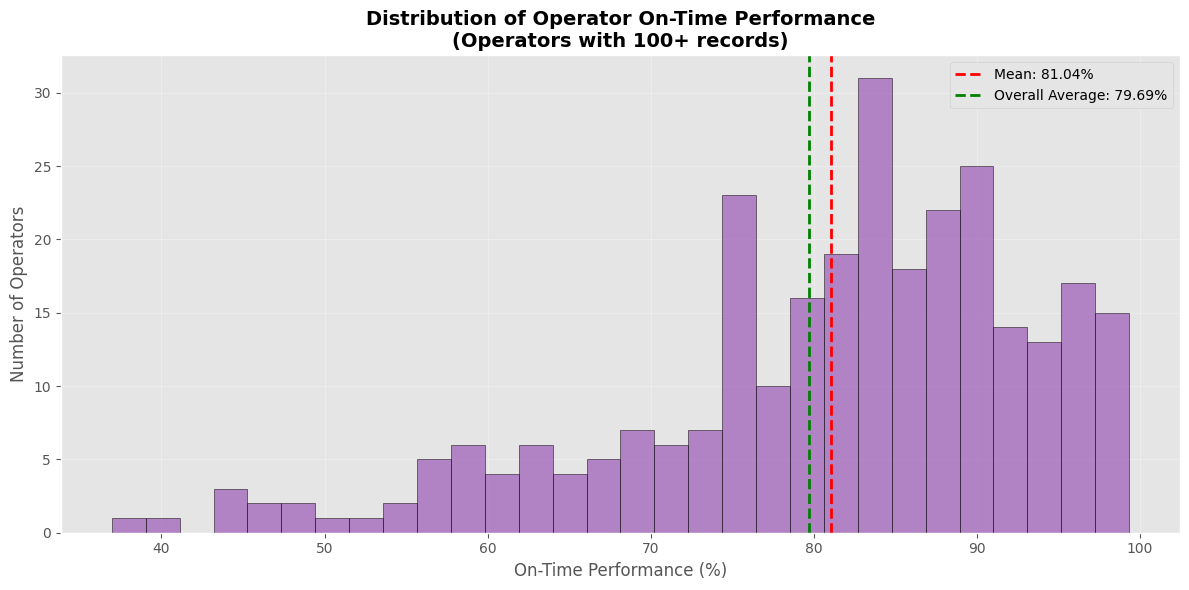

In [13]:
# Visualize operator performance distribution
plt.figure(figsize=(12, 6))
plt.hist(operator_filtered['OnTime_Pct'], bins=30, color='#9B59B6', edgecolor='black', alpha=0.7)
plt.axvline(operator_filtered['OnTime_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {operator_filtered['OnTime_Pct'].mean():.2f}%")
plt.axvline(79.69, color='green', linestyle='--', linewidth=2, label='Overall Average: 79.69%')
plt.xlabel('On-Time Performance (%)', fontsize=12)
plt.ylabel('Number of Operators', fontsize=12)
plt.title('Distribution of Operator On-Time Performance\n(Operators with 100+ records)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Question 5: Adherence vs Headway Deviation

Is there any relationship between lateness (ADHERENCE) and headway deviation (HDWY_DEV)?

In [14]:
# Filter out records without headway data
headway_data = wego[wego['SCHEDULED_HDWY'].notna() & wego['HDWY_DEV'].notna()].copy()

# Calculate correlation
correlation = headway_data['ADHERENCE'].corr(headway_data['HDWY_DEV'])
print(f"Correlation between ADHERENCE and HDWY_DEV: {correlation:.4f}")

# Calculate headway deviation percentage
headway_data['HDWY_DEV_PCT'] = (headway_data['HDWY_DEV'] / headway_data['SCHEDULED_HDWY']) * 100

print(f"\nHeadway Deviation Statistics:")
print(headway_data['HDWY_DEV_PCT'].describe().round(2))

Correlation between ADHERENCE and HDWY_DEV: -0.2068

Headway Deviation Statistics:
count    265890.00
mean           inf
std            NaN
min        -100.00
25%         -14.17
50%           0.19
75%          15.52
max            inf
Name: HDWY_DEV_PCT, dtype: float64


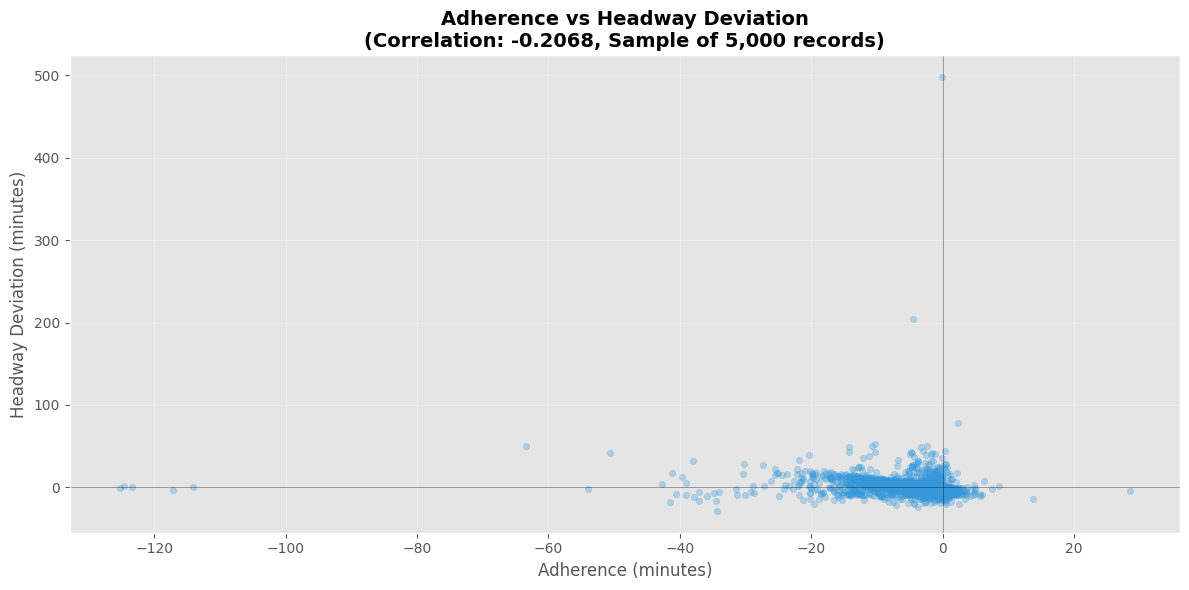

In [15]:
# Scatter plot with sampling (to avoid overplotting)
sample_size = min(5000, len(headway_data))
sample_data = headway_data.sample(n=sample_size, random_state=42)

plt.figure(figsize=(12, 6))
plt.scatter(sample_data['ADHERENCE'], sample_data['HDWY_DEV'], alpha=0.3, s=20, color='#3498DB')
plt.xlabel('Adherence (minutes)', fontsize=12)
plt.ylabel('Headway Deviation (minutes)', fontsize=12)
plt.title(f'Adherence vs Headway Deviation\n(Correlation: {correlation:.4f}, Sample of {sample_size:,} records)', fontsize=14, fontweight='bold')
plt.axhline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary of Findings

Key takeaways from the analysis:

1. **Overall Performance**: The system achieves approximately 79.69% on-time performance
2. **Geographic Patterns**: Different routes and directions show varying performance levels
3. **Temporal Patterns**: Performance varies by time of day and day of week
4. **Driver Impact**: Individual operators show varying levels of on-time performance
5. **Adherence-Headway Relationship**: There is a measurable correlation between bus lateness and headway deviation